<a href="https://colab.research.google.com/github/nilakshi104/Staircase-Segmentation/blob/master/Staircase_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Importing libraries

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
# from fastai.sgdr import *
# import cv2.imshow
from sklearn.metrics import fbeta_score   #for calculating f_score which is measure of accuracy
# from sklearn.metrics import roc_auc_score

In [ ]:
import torch
import torchvision
import zipfile
from PIL import Image

In [ ]:
#RUN ONLY ONCE 

# with zipfile.ZipFile('train_masks.zip','r') as zip_ref:
#     zip_ref.extractall('train_masks')

# with zipfile.ZipFile('train.zip','r') as zip_ref:
#     zip_ref.extractall('train')
    
# with zipfile.ZipFile('val_masks.zip','r') as zip_ref:
#     zip_ref.extractall('val_masks')

# with zipfile.ZipFile('val.zip','r') as zip_ref:
#     zip_ref.extractall('val')

# with zipfile.ZipFile('test_masks.zip','r') as zip_ref:
#     zip_ref.extractall('test_masks')

# with zipfile.ZipFile('test.zip','r') as zip_ref:
#     zip_ref.extractall('test')

In [ ]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu");
print(device)

cuda:0


In [ ]:
# path=untar_data(URLs.CAMVID)

In [ ]:
# path.ls()

list of labels is defined in text file and that file is loaded here


In [ ]:
colors = np.loadtxt('Dataset/stair.txt',delimiter='\n',dtype=str);
colors

array(['Background', 'Stairedge'], dtype='<U10')

get_image_files Return list of files in path_images that are images.

In [ ]:
path_images='Dataset/train'
path_valid='Dataset/val'
fnames=get_image_files(path_images)

In [ ]:
fnames

[PosixPath('Dataset/train/1000.png'),
 PosixPath('Dataset/train/1001.png'),
 PosixPath('Dataset/train/1002.png'),
 PosixPath('Dataset/train/1004.png'),
 PosixPath('Dataset/train/1005.png'),
 PosixPath('Dataset/train/1006.png'),
 PosixPath('Dataset/train/1007.png'),
 PosixPath('Dataset/train/1008.png'),
 PosixPath('Dataset/train/1010.png'),
 PosixPath('Dataset/train/1011.png'),
 PosixPath('Dataset/train/1012.png'),
 PosixPath('Dataset/train/1013.png'),
 PosixPath('Dataset/train/1014.png'),
 PosixPath('Dataset/train/1015.png'),
 PosixPath('Dataset/train/1016.png'),
 PosixPath('Dataset/train/1017.png'),
 PosixPath('Dataset/train/1018.png'),
 PosixPath('Dataset/train/1019.png'),
 PosixPath('Dataset/train/1020.png'),
 PosixPath('Dataset/train/1021.png'),
 PosixPath('Dataset/train/1022.png'),
 PosixPath('Dataset/train/1024.png'),
 PosixPath('Dataset/train/1025.png'),
 PosixPath('Dataset/train/1026.png'),
 PosixPath('Dataset/train/1028.png'),
 PosixPath('Dataset/train/1029.png'),
 PosixPath('

In [ ]:
random.seed(4) #so evertime we run notebook we get same seq of numbers

pathlib.PosixPath

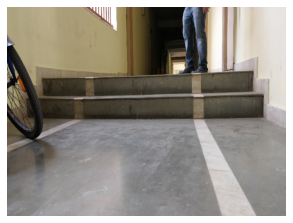

In [ ]:
img_f = fnames[420]
img = open_image(img_f) #img_f is of type Posix_path
img.show(figsize=(5,5))
type(img_f)

In [ ]:
import posixpath
get_y_fn = lambda x: (posixpath.join('Dataset/train_masks',f'{x.stem}_mask1{x.suffix}')) if (x.parent.stem == 'train') else (posixpath.join('Dataset/val_masks',f'{x.stem}_mask1{x.suffix}'))
# get_y_fn=lambda x:path_lbl/f'{x.stem}_mask{x.suffix}'

In [ ]:
# 'print(img_f)' #prints /content/gdrive/My Drive/Untitled folder/stair_dataset/train/989.png
# 'print(img_f.parent.parent)' #prints /content/gdrive/My Drive/Untitled folder/stair_dataset
# 'print(img_f.parent)' #prints /content/gdrive/My Drive/Untitled folder/stair_dataset/train
# 'print(img_f.stem)' #prints 989
# 'print(img_f.name)' #prints 989.png
# 'posixpath.join(img_f.parent,'_labels')' #prints '/content/gdrive/My Drive/Untitled folder/stair_dataset/train/_labels'

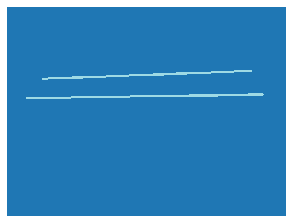

In [ ]:
mask = open_mask(get_y_fn(img_f))

mask.show(figsize=(5,5), alpha=1)

In [ ]:
mask.data #prints matrix by showing each pixel in groud_truth by its resp. class label

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])

In [ ]:
dummy=mask.data
dummy[0,4,:]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
np.unique(mask.data) #prints class labels

array([  0, 255])

Now we have to convert class labels to [0,1] as their are 2 classes .If class number =x then class label should range from [0,x-1]

For that will pass div argument as True in open function of SegLabelListCustom class which is child class of SegmentationLabelList

 by using div=True 0/255=0,255/255=1

In [ ]:
class SegLabelListCustom(SegmentationLabelList):
        def open(self, fn): return open_mask(fn, div=True)

class SegItemListCustom(SegmentationItemList):
    _label_cls = SegLabelListCustom

In [ ]:
src_size = np.array(mask.shape[1:])
src_size

array([480, 640])

In [ ]:
src = (SegItemListCustom.from_folder(Path('Dataset'))
   .split_by_folder(train='train',valid='val')
   .label_from_func(get_y_fn, classes=colors)
   .transform(get_transforms(),tfm_y=True, size=src_size//2)#tfms_y=True because transforms we r applying on trainset,will be also applied on train_masks
   .add_test_folder(test_folder='test',tfms=None,tfm_y=False)#since test_masks are empty we dont need tfms on ground truth here so tfm_y=False
   )

In [ ]:
# cl = CategoryList(src.train.y.items, src.train.y.classes); cl
src.train.y.classes

array(['Background', 'Stairedge'], dtype='<U10')

In [ ]:
src.test

(Image (3, 240, 320), EmptyLabel )

In [ ]:
# tfms = get_transforms(do_flip=True,size=src_size//2)
data = (src
        .databunch(bs=8)
        .normalize(imagenet_stats))

In [ ]:
 data

ImageDataBunch;

Train: LabelList (771 items)
x: SegItemListCustom
Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320)
y: SegLabelListCustom
ImageSegment (1, 240, 320),ImageSegment (1, 240, 320),ImageSegment (1, 240, 320),ImageSegment (1, 240, 320),ImageSegment (1, 240, 320)
Path: Dataset;

Valid: LabelList (97 items)
x: SegItemListCustom
Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320)
y: SegLabelListCustom
ImageSegment (1, 240, 320),ImageSegment (1, 240, 320),ImageSegment (1, 240, 320),ImageSegment (1, 240, 320),ImageSegment (1, 240, 320)
Path: Dataset;

Test: LabelList (96 items)
x: SegItemListCustom
Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320)
y: EmptyLabelList
,,,,
Path: Dataset

In [ ]:
# data.train_ds[0][1].data
np.unique(data.train_ds[0][1].data)
# data.valid_ds[0][1]
# data.valid_ds[0][0]

array([0, 1])

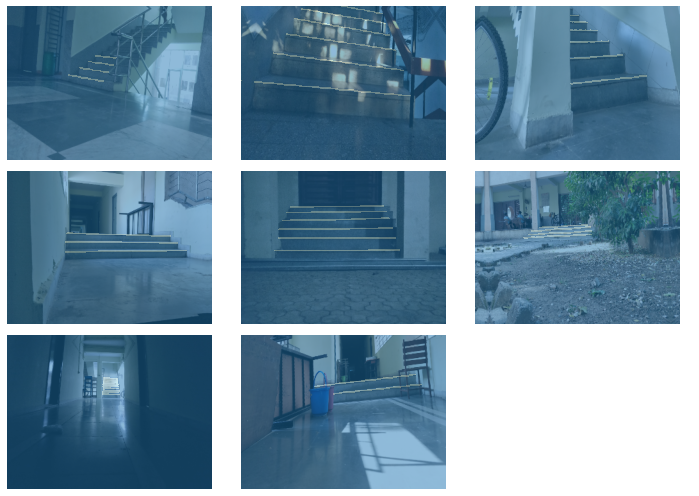

In [ ]:
data.show_batch(figsize=(10,7)) #in case of sementic segmentation masks are overlapped on images so stair_edges are yellow and background is blue

[link text](https://www.google.com/url?sa=i&url=https%3A%2F%2Fbecominghuman.ai%2Finvestigating-focal-and-dice-loss-for-the-kaggle-2018-data-science-bowl-65fb9af4f36c&psig=AOvVaw3pwRINI02Q3a57KqHGCigW&ust=1588867703677000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCOjD28vPn-kCFQAAAAAdAAAAABAD)


In [ ]:
#method1:
# class FocalLoss(nn.Module):
#     def __init__(self, ):
#         super(FocalLoss,self).__init__()
#     def forward(self,inputs,targets):
#         #IN CE REDUCTION IS BYDEFAULT SET TO MEAN
#         CE_loss=torch.nn.CrossEntropyLoss(weight=(torch.tensor([1.,50.])).to(device))(inputs,targets.squeeze(1))
#         return CE_loss

In [ ]:
# method2
class FocalLoss(nn.Module):
    def __init__(self, alpha=1.,gamma=2.,reduction='mean'):
        super(FocalLoss,self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction=reduction

    def forward(self, inputs, targets):
        CE_loss = torch.nn.CrossEntropyLoss(reduction=self.reduction)(inputs, targets.squeeze(1))
        pt = torch.exp(-CE_loss)
        F_loss = self.alpha * ((1-pt)**self.gamma) * CE_loss
#         if self.reduction is None:
#             return F_loss
#         else:
#             return torch.mean(F_loss)
        return F_loss
    
# def roc_score(inp, target):
#     _, indices = inp.max(1)
#     return torch.Tensor([roc_auc_score(target, indices)])[0]

[link text](https://www.google.com/url?sa=i&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FF1_score&psig=AOvVaw2xNbYjeRcG_MjA_nq14IuR&ust=1588868231066000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCKCslafSn-kCFQAAAAAdAAAAABAD)

F0.5_score=when beta=0.5,more attention is given on precision(false_positives are more imp  to minimize but fasle_negatives are still imp)

F1_score=when beta=1,recall and precision have balanced weight

F2_score=when beta=2,more attention is given on recall(false_negatives are more imp  to minimize but fasle_positives are still imp)

[link text](https://www.google.com/url?sa=i&url=https%3A%2F%2Fmikulskibartosz.name%2Ff1-score-explained%2F&psig=AOvVaw3QBsmhfrmqM7Fthow-8n9Q&ust=1588868556033000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCNiolv3Sn-kCFQAAAAAdAAAAABAD)

minor elements are considered as positive elements so we need to minimize false_negatives (i.e. cases where stair_edges are detected as background)
so here will use beta=2

In [ ]:
#FOR SINGLE IMG

def f2_score(input,target):
  f=0
  input=input.to("cpu")
  target=target.to("cpu")
  input=input.argmax(dim=1)
  for i in range(input.shape[0]):
    input1=input[i,:,:]
    input1=input1.reshape(-1,1)
    input1=input1.squeeze(1)
    target1=target[i,:,:]
    target1=target1.reshape(-1,1)
    target1=target1.squeeze(1)
    # precision_score(targets, inputs, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    # recall_score(targets,inputs, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    k=fbeta_score(target1, input1, beta=2)
    f+=k
    # print(f"{num}:{k}")

  return torch.tensor(f/input.shape[0])

In [ ]:
# def accu(input, target):
#     target = target.squeeze(1)
#     return (input.argmax(dim=1)==target).float().mean()

# accuracy=accu
f2_score=f2_score
loss_func1 = FocalLoss()
wd=1e-6

In [ ]:
def fit_sgd_warm(learn,n_cycles,lr, mom, cycle_len, cycle_mult):
    n = len(learn.data.train_dl)
    phases = [(TrainingPhase(n * (cycle_len * cycle_mult**i))
                 .schedule_hp('lr', lr, anneal=annealing_cos)
                 .schedule_hp('mom', mom)) for i in range(n_cycles)]
    sched = GeneralScheduler(learn, phases)
    learn.callbacks.append(sched)
    if cycle_mult != 1:
        total_epochs = int(cycle_len * (1 - (cycle_mult)**n_cycles)/(1-cycle_mult)) 
    else: total_epochs = n_cycles * cycle_len
    learn.fit(total_epochs)

In [ ]:
learn = unet_learner(data,models.resnet34, metrics=f2_score, loss_func=loss_func1,wd=wd)
#try resnet54
#learn.freeze()    #NO NEED TO START MODEL WITH LEARN.FREEZE()...BUT IF MODEL IS UNFREEZED AND V NEED TO FREEZE IT AGAIN THEN WE NEED TO SPECIFY

epoch,train_loss,valid_loss,f2_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


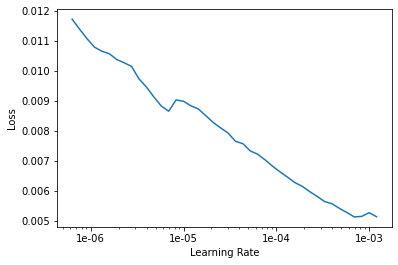

In [ ]:
# learn.load('stage-1-big')
# learn.export()
lr_find(learn)
learn.recorder.plot()

In [ ]:
fit_sgd_warm(learn,n_cycles=50,lr=1e-4,mom=0.9,cycle_len=1,cycle_mult=2)

epoch,train_loss,valid_loss,f2_score,time
0,0.001617,0.000851,0.181666,00:37
1,0.000722,0.000525,0.269384,00:35
2,0.000487,0.000498,0.247523,00:36
3,0.000403,0.000386,0.351169,00:36
4,0.000311,0.000326,0.315090,00:36
5,0.000250,0.000319,0.358269,00:37
6,0.000215,0.000298,0.394879,00:37
7,0.000297,0.000315,0.334897,00:37
8,0.000233,0.000257,0.467798,00:38
9,0.000205,0.000242,0.424676,00:38


KeyboardInterrupt: 

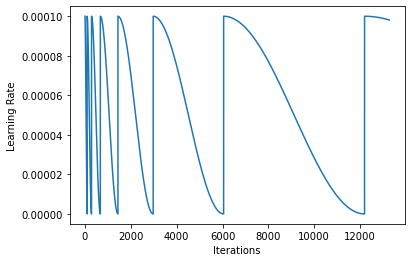

In [ ]:
learn.recorder.plot_lr()

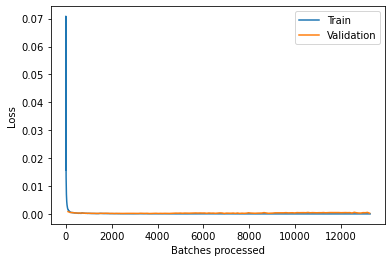

In [ ]:
# import matplotlib.pyplot as plt
# plt.plot(learn.loss)
learn.recorder.plot_losses()

In [ ]:
# learn.fit_one_cycle??      #to check documentation

In [ ]:
# lr=1e-4
# #1
# lr_set=[1e-4 , 1e-5 , (1e-5)/2]
# learn.fit_one_cycle(3,lr_set,cycle_len=1)

#2:Cosine Anneling
# learn.fit(epochs=1,lr=lr)    #where 0.1 is max lr then lr decreases in cosine graph fashion till end

#3:Stochastic Gradient Descent with restart
#method1:
# learn.fit(epochs,learning_rate)    #lr is reset at the start of each epoch to 'learning_rate' value v specified the decrease again over epoch in cosine annealing fashion

#method2:
# cycle_len=1 #decide how many epochs it takes for lr to fall to its min point.Here as specified 1 epoch
# cycle_mult=2 #at the end of each_cycle,multiply cycle_len by 2
# learn.fit(epochs,learning_rate,cycle_len=1,cycle_mult=2)
#in this case there will be three restarts.THe first time with cycle_len of 1,so it will take 1 epoch to complete cycle.cycle_mult=2 so next cycle will have 2 epochs then next 4 epochs and so on

In [ ]:
# learn.fit_one_cycle(50, slice(lr), pct_start=0.4)
# learn.fit(30,lr=lr,cycle_len=1,cycle_mult=2)
# lr_set=[1e-4 , 1e-5 , (1e-5)/2]
# learn.fit(epochs=3,lr=lr_set)

epoch,train_loss,valid_loss,f2_score,accu,time
0,0.002915,0.003223,0.495453,0.977079,00:37
1,0.002969,0.003134,0.460585,0.977459,00:37
2,0.002821,0.003172,0.471599,0.977355,00:38


In [ ]:
# lr=1e-4
# learn.fit(epochs=3,lr=slice(lr))

epoch,train_loss,valid_loss,f2_score,accu,time
0,0.005447,0.005476,0.161403,0.973761,00:38
1,0.003974,0.003461,0.413588,0.976977,00:37
2,0.003555,0.003188,0.433285,0.977595,00:37


In [ ]:
learn.save('stage-1-freeze')

In [ ]:
learn.unfreeze()

epoch,train_loss,valid_loss,f2_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


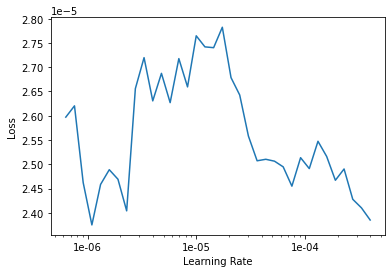

In [ ]:
#AFTER UNFREEZE AGAIN CHECK FOR LR
lr_find(learn)
learn.recorder.plot()

In [ ]:
fit_sgd_warm(learn,n_cycles=3,lr=1e-7,mom=0.9,cycle_len=1,cycle_mult=2)

epoch,train_loss,valid_loss,f2_score,time
0,0.000028,0.000352,0.719567,00:37
1,0.000028,0.000343,0.718049,00:37
2,0.000029,0.000347,0.719296,00:38
3,0.000026,0.000342,0.719299,00:38
4,0.000028,0.000353,0.713439,00:38
5,0.000028,0.000345,0.717765,00:39
6,0.000029,0.000343,0.716571,00:40


In [ ]:
fit_sgd_warm(learn,n_cycles=3,lr=1e-7,mom=0.9,cycle_len=1,cycle_mult=2)

In [ ]:
learn.save('stage-1-unfreeze')

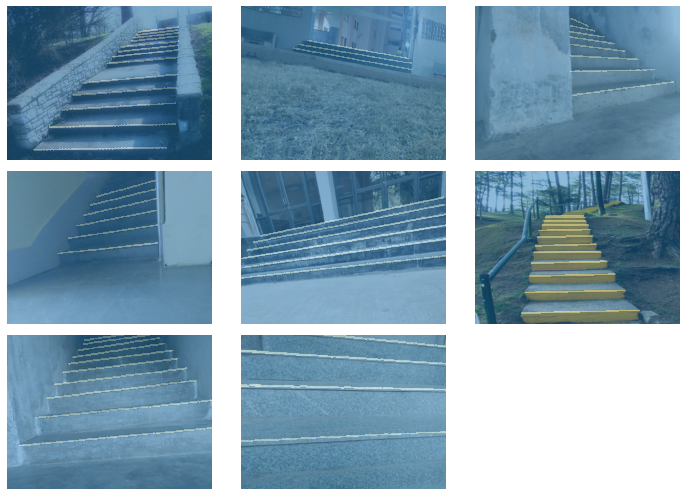

In [ ]:
#TO INCREASE F SCORE BY 1-2 percent WE WILL INCREASE SIZE OF IMAGE AND TRAIN AGAIN 
src = (SegItemListCustom.from_folder(Path('Dataset'))
   .split_by_folder(train='train',valid='val')
   .label_from_func(get_y_fn, classes=colors)
   .transform(get_transforms(),tfm_y=True, size=src_size)#tfms_y=True because transforms we r applying on trainset,will be also applied on train_masks
   .add_test_folder(test_folder='test',tfms=None,tfm_y=False)#since test_masks are empty we dont need tfms on ground truth here so tfm_y=False
   )

data = (src
        .databunch(bs=8)
        .normalize(imagenet_stats))

data.show_batch(figsize=(10,7)) 

In [ ]:
learn.data=data
learn.freeze()

epoch,train_loss,valid_loss,f2_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


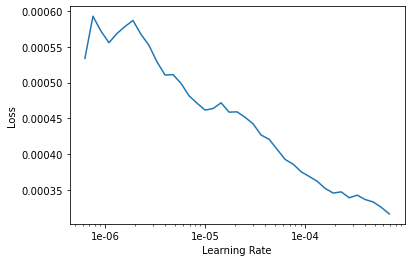

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
fit_sgd_warm(learn,n_cycles=3,lr=1e-4,mom=0.9,cycle_len=1,cycle_mult=2)

epoch,train_loss,valid_loss,f2_score,time
0,0.000112,0.000139,0.639538,02:23


In [ ]:
learn.unfreeze()
fit_sgd_warm(learn,n_cycles=3,lr=1e-4,mom=0.9,cycle_len=1,cycle_mult=2)

epoch,train_loss,valid_loss,f2_score,time
0,0.000096,0.000115,0.624656,02:26


In [ ]:
# learn.validate()
# learn.show_results(ds_type=DatasetType.Valid)

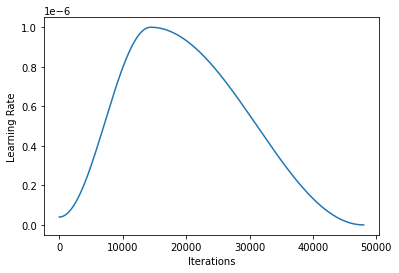

In [ ]:
learn.recorder.plot_lr()

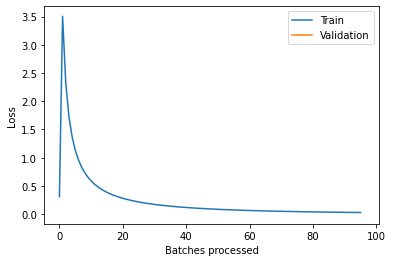

In [ ]:
learn.recorder.plot_losses()

In [ ]:
# interp=ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()
# # learn = cnn_learner(data, models.resnet18)
# # learn.fit(1)
# preds,y,losses = learn.get_preds(with_loss=True)
# interp = ClassificationInterpretation(learn, preds, y, losses)
# interp

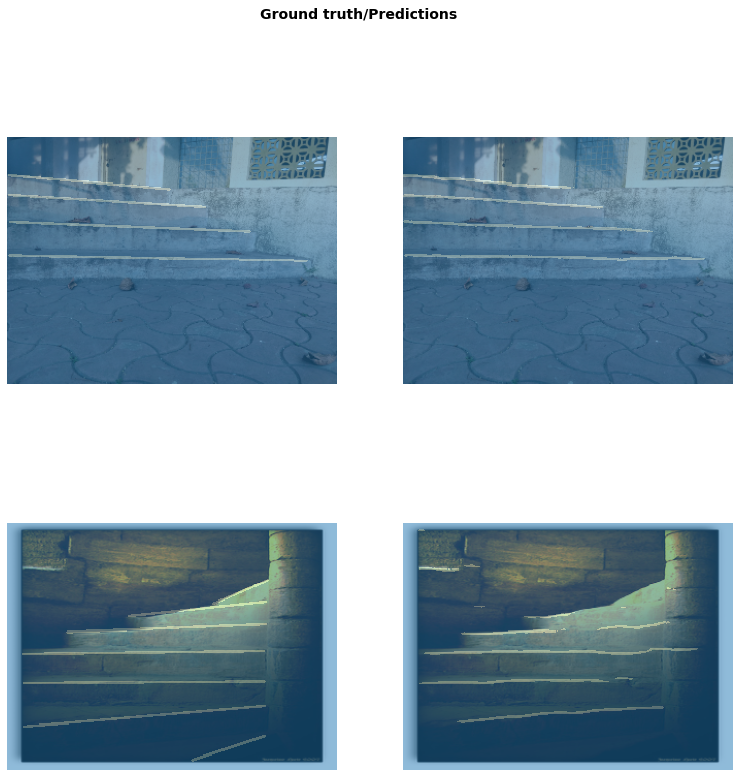

In [ ]:
k=learn.show_results(rows=2, figsize=(13,13))

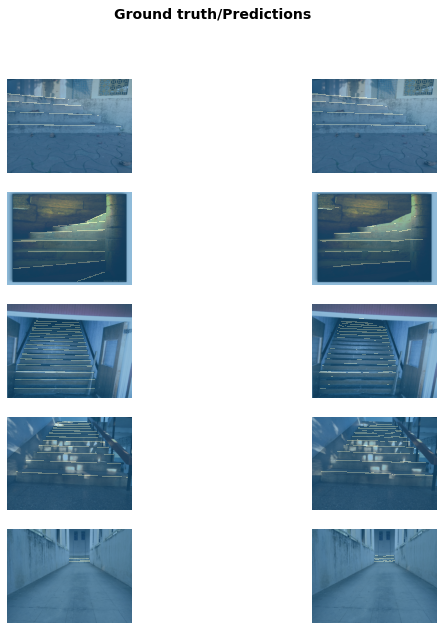

In [ ]:
k=learn.show_results(figsize=(10,10))

In [ ]:
# k=learn.show_results(figsize=(10,10))
path_images='Dataset/test'
fnames=get_image_files(path_images)
fnames[0:10]

[PosixPath('Dataset/test/1475.png'),
 PosixPath('Dataset/test/1476.png'),
 PosixPath('Dataset/test/1477.png'),
 PosixPath('Dataset/test/1478.png'),
 PosixPath('Dataset/test/1479.png'),
 PosixPath('Dataset/test/1481.png'),
 PosixPath('Dataset/test/1482.png'),
 PosixPath('Dataset/test/1483.png'),
 PosixPath('Dataset/test/1484.png'),
 PosixPath('Dataset/test/1485.png')]

In [ ]:
# img = data.test_ds[90][0]
test_image = open_image('Dataset/test/1492.png')
img_segment = learn.predict(test_image)[0]

In [ ]:
test_image_data=test_image.data.permute(1,2,0)
# test_image_data.size()
img_segment_data=img_segment.data*255
img_segment_data=img_segment_data.permute(1,2,0)
# img_segment_data.size()

In [ ]:
for i in range(img_segment_data.size(0)):
    for j in range(img_segment_data.size(1)):
        if img_segment_data[i,j,0] == tensor(255):
            test_image_data[i,j,:]=torch.tensor([255,255,0])

output_numpy=test_image_data.numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


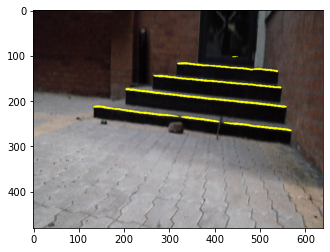

In [ ]:
plt.imshow(output_numpy)
plt.show()

In [ ]:
test_image_data[100,100,:]

tensor([0.1333, 0.0745, 0.0627])